In [1]:
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

#데이터를 불러옴
(X_train,y_train),(X_test,y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28,28,1).astype('float32')/255
X_test= X_test.reshape(X_test.shape[0], 28,28,1).astype('float32')/255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test) 

#모델 설정
model = Sequential()
# 컨볼루션 적용 : Conv2D
# 32는 커널의 갯수 , (3,3)는 커널의 크기,
# input_shape = (행, 열, 색상 또는 흑백) : (28, 28, 1)
#                           흑백이면 1 색상이면 3
model.add(Conv2D(32, kernel_size=(3,3),input_shape=(28, 28,1), activation="relu"))
model.add(Conv2D(64, (3,3), activation="relu"))
# 맥스 풀링 적용 : MaxPooling2D
# pool_size를 통해 풀링 창의 크기
# (2,2)는 가로 2 , 세로 2 크기의 풀링 창을 통해 맥스 풀링을 진행
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) # 노드를 25% 끄고 사용
model.add(Flatten()) # 2차원을 1차원 변경 (28, 28) => (784,)
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
#모델 최적화
modelpath ="./data/model/MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath ,monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=10 )
# 모델실행
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train,y_train,epochs=30,batch_size=200,verbose=0, validation_split=0.25, callbacks=[early_stopping_callback,checkpointer])
#테스트 정확도를 출력
model.evaluate(X_test, y_test)[1]








Epoch 1: val_loss improved from inf to 0.08239, saving model to ./data/model\MNIST_CNN.hdf5


C:\Users\chanwoo kang\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.08239 to 0.06292, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.06292 to 0.04994, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.04994 to 0.04590, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 5: val_loss improved from 0.04590 to 0.04554, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 6: val_loss improved from 0.04554 to 0.04347, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 7: val_loss did not improve from 0.04347

Epoch 8: val_loss improved from 0.04347 to 0.04223, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 9: val_loss improved from 0.04223 to 0.04205, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 10: val_loss did not improve from 0.04205

Epoch 11: val_loss did not improve from 0.04205

Epoch 12: val_loss improved from 0.04205 to 0.04113, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 13: val_loss did not improve from 0.04113

Epoch 14: val_loss did not 

0.9922999739646912

In [2]:
from PIL import Image
import numpy as np
# 이미지 전처리
image_path = 'img6.jpg'
image = Image.open(image_path)
image = image.convert('L')  # 흑백 이미지로 변환
image = image.resize((28, 28))  # 28x28 크기로 조정
image = np.asarray(image)
image = image.reshape(1, 28, 28, 1).astype('float32') / 255  # 모델 입력 형태에 맞게 재구성
if image[0, 0, 0, 0] > 0:  # 이미지 특성에 따라 조건을 조절하세요.
    image = abs(1 - image)
# 예측하기
prediction = model.predict(image)
digit = np.argmax(prediction)
print("예측 결과:", digit)

1/1 [==============================] - 0s 83ms/step
예측 결과: 6


In [8]:
# 순환 신경망(Recurrent Neural Network, RNN) => LSTM(Long Short Term Memory)
# 입력된 값에 맞는 결과를 가져올 때 까지 한 곳에서 순환하는 것을 
# 첫번째 입력 값에 맞는 결과 값이 나올 때 까지 계속 순환
# 첫번째 입력 값에 대한 결과와 같이 두번째 입력 값으로 맞는 결과를 가져올 때까지 순환
# 첫번째 결과값 그리고 두번째 결과값과 함께 세번째 입력값에 맞는 결과를 가져올 때까지 순환
# 이와 같은 방법으로 반복해서 결과를 출력 
# RNN은 앞에 결과에 따라 뒤 입력값에 영향을 준다.
# 앞에 결과값을 관리할 필요가 있어서 LSTM을 이용해서 결과값을 관리하게 한다.

In [3]:
# RNN 과 LSTM을 사용
# 로이터 뉴스 데이터셋
from tensorflow.keras.datasets import reuters

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
# 데이터 불러오기
# 학습셋, 테스트셋
(X_train, y_train),(X_test, y_test) = reuters.load_data(num_words=1000, test_split = 0.2) 
# 카테고리 갯수
# 카테고리의 번호 : [0,1,2,3,4,5,..., 45]
np.max(y_train) + 1 # 
# 단어의 수를 맞어주기
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)
# 원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# 모델의 구조
model = Sequential()
#      Embedding(불러온 단어의 총수,기사당 단어 수)
model.add(Embedding(1000,100))
#         LSTM(기사당 단어 수, 기타 옵션) 
# LSTM를 사용한 경우 활성 함수는 tanh
model.add(LSTM(100, activation = 'tanh'))
model.add(Dense(46, activation="softmax"))
# 학습의 조기 중단
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)
# 모델의 실행
model.compile(loss="categorical_crossentropy" , optimizer="adam", metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test),callbacks=[early_stopping_callback])
# validation_split=0.25
# 테스트 정확도
model.evaluate(X_test, y_test)[1]

Epoch 1/200
450/450 [==============================] - 14s 28ms/step - loss: 2.2376 - accuracy: 0.4308 - val_loss: 2.0215 - val_accuracy: 0.5209
Epoch 2/200
450/450 [==============================] - 13s 28ms/step - loss: 1.8074 - accuracy: 0.5455 - val_loss: 1.7263 - val_accuracy: 0.5686
Epoch 3/200
450/450 [==============================] - 13s 28ms/step - loss: 1.6705 - accuracy: 0.5794 - val_loss: 1.6375 - val_accuracy: 0.6033
Epoch 4/200
450/450 [==============================] - 13s 28ms/step - loss: 1.5078 - accuracy: 0.6198 - val_loss: 1.4789 - val_accuracy: 0.6376
Epoch 5/200
450/450 [==============================] - 13s 28ms/step - loss: 1.3319 - accuracy: 0.6651 - val_loss: 1.3583 - val_accuracy: 0.6634
Epoch 6/200
450/450 [==============================] - 12s 27ms/step - loss: 1.2021 - accuracy: 0.6952 - val_loss: 1.2804 - val_accuracy: 0.6794
Epoch 7/200
450/450 [==============================] - 13s 28ms/step - loss: 1.0925 - accuracy: 0.7259 - val_loss: 1.2360 - val_ac

0.7146037220954895

In [4]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 입력 텍스트에 대한 토크나이저 피팅 수정
input_text = ["오늘 출근길에 차 사고가 났습니다."]
tokenizer = Tokenizer(num_words=1000)
# X_train이 아닌 input_text에 대해 피팅하도록 변경
tokenizer.fit_on_texts(input_text)  
input_sequence = tokenizer.texts_to_sequences(input_text)
input_sequence_padded = pad_sequences(input_sequence, maxlen=100)
# 훈련된 모델을 사용하여 예측
predictions = model.predict(input_sequence_padded)
# 예측된 카테고리 인덱스 가져오기
predicted_category_index = np.argmax(predictions[0])
# 인덱스를 원래 카테고리로 매핑 # 날씨 , 주식, 사회, 정치
print(f"예측된 카테고리 인덱스: {predicted_category_index}")
'''
00 : 미국,01 : 가장자리 지역,02 : 비즈니스,03 : 과학 기술,04 : 건강,05 : 문화 및 종교
06 : 스포츠,07 : 생활/여가,08 : 국제,09 : 국내 재무,10 : 상업,11 : 엔터테인먼트 및 예술
12 : 학문/과학,13 : 건강,14 : 기업/금융,15 : 에너지,16 : 환경,17 : 산업,18 : 기술
19 : 교통,20 : 세계,21 : 연예,22 : 정치,23 : 연구/개발,24 : 미국의 제재 및 관리 기구
25 : 지역 관리,26 : 테러리즘,27 : 화재/폭발,28 : 법률/범죄,29 : 폭력/사고,30 : 통신
31 : 통신/미디어,32 : 군사/방위,33 : 교통/물류,34 : 자연재해,35 : 인프라 시설,36 : 농업
37 : 농촌 및 어민,38 : 자원 및 에너지,39 : 항공/방위,40 : 식량,41 : 농업 생산성
42 : 식품 및 음료,43 : 장비,44 : 통신 장비 및 서비스,45 :미분류
'''
print()

1/1 [==============================] - 0s 312ms/step
예측된 카테고리 인덱스: 44



In [5]:
#LSTM과 CNN(컨볼루션)의 조합을 이용한 영화 리뷰 분류하기
from tensorflow.keras.datasets import imdb

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPooling1D, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import sequence
import numpy as np
# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)
# 단어의 수를 맞추어 줍니다. 
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)
# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Embedding(5000, 100)) # RNN
model.add(Dropout(0.5))
# Conv2D : 2차원
# Conv1D : 1차원
model.add(Conv1D(64, 5, padding="valid", activation="relu" , strides=1)) #CNN
model.add(MaxPooling1D(pool_size=4))  #CNN
model.add(LSTM(55)) # 
model.add(Dense(1))
model.add(Activation("sigmoid"))
# model.add(Dense(1, activation = 'sigmoid'))
# 학습의 조기 중단을 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)
# 모델의 실행 옵션을 정합니다.
model.compile(loss="binary_crossentropy", optimizer="adam" , metrics=['accuracy'])
# 테스트 정확도
model.evaluate(X_test, y_test)

782/782 [==============================] - 10s 12ms/step - loss: 0.6934 - accuracy: 0.5000


[0.6933507919311523, 0.5000399947166443]

1/1 [==============================] - 0s 87ms/step
0.700422614812851 0.8702940940856934


FileNotFoundError: [Errno 2] No such file or directory: './data/gan_images/gan_mnist_0.png'

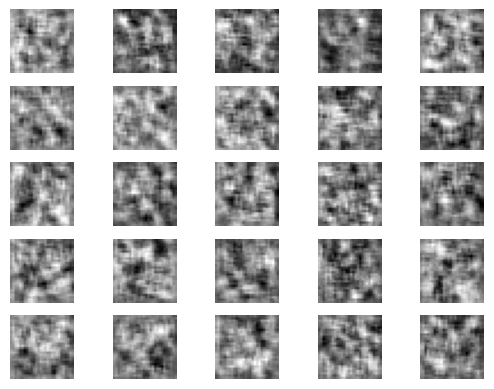

In [6]:
# 손글씨
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Reshape, LeakyReLU, Dropout, Flatten, Input
from tensorflow.keras.layers import BatchNormalization, UpSampling2D, Conv2D, Activation
import numpy as np
import matplotlib.pyplot as plt
# 모델생성
# 생산자 모델을 만듭니다.
generator = Sequential()
# 128은 임의의 수 128이 아니어도 됨, 100차원으로 입력. 100이 아니어도 됨,
# GAN에서는 ReLU함수가 불안해서 LeakyReLU함수 사용
# 이미지 크기 28*28 이므로 7 * 7이라고 함
generator.add(Dense(128 * 7 * 7 , input_dim=100 , activation = "LeakyReLU"))
generator.add(BatchNormalization())
generator.add(Reshape((7, 7, 128)))
generator.add(UpSampling2D())  # 7 * 7인 이미지를  14 * 14 
generator.add(Conv2D(64, kernel_size=5 , padding='same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D()) # 14 * 14 인 이미지가 28 * 28
generator.add(Conv2D(1, kernel_size=5 , padding='same', activation="tanh"))
# 판별자 모델을 만듭니다.
discriminator = Sequential()
# 컨볼루션을 이용해서 만든다.
discriminator.add(Conv2D(64, kernel_size=5, strides = 2, input_shape=(28,28,1), padding='same'))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides = 2, padding='same'))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation="sigmoid"))

# 판별자 실행
discriminator.compile(loss="binary_crossentropy",optimizer='adam')
# 판별자는 학습을 해서는 안됨
discriminator.trainable = False 

# 생산자와 판별자 모델을 연결시키는 gan 모델을 만듭니다.
ginput =  Input(shape=(100,)) # input_dim=100
# 판별자에게 생산자가 만든 값을 전달
dis_output = discriminator(generator(ginput))
gan =  Model(ginput, dis_output)
gan.compile(loss="binary_crossentropy",optimizer='adam')

epoch = 2001
batch_size = 32  # 몇개의 가상이미지를 판별자에게 넣을지 결정하는 변수
# MNIST 데이터를 불러옵니다.
(X_train, _),(_, _) = mnist.load_data()
# 가로세로 28픽셀이고 흑색이므로 1
X_train = X_train.reshape(X_train.shape[0],28, 28, 1).astype('float32')
# 255로 나누면 0 ~ 1이죠... -1 ~ 1사이의 값을 가지도록
X_train = (X_train - 127) / 127

# 거짓과 참을 판별하기 위한 32행 1열
true = np.ones((batch_size, 1)) 
fake = np.zeros((batch_size, 1))

for i in range(epoch):
     # 실제 데이터를 판별자에 입력하는 부분입니다
    # 판별자에게 이미지를 랜덤하게 전달
    idx = np.random.randint(0, X_train.shape[0], batch_size)
      # 손글씨 이미지를 랜덤으로 불러옴
    imgs = X_train[idx]
    # 랜덤으로 불러온 이미지를 판별자에게 전달
    # train_on_batch : 판별시작
    d_loss_real = discriminator.train_on_batch(imgs,true)

    # 임의의 숫자 데이터 0 ~ 1
    # 가짜 데이터 생성
    noise = np.random.normal(0, 1, (batch_size, 100))
    gen_imgs = generator.predict(noise)
    d_loss_fake = discriminator.train_on_batch(gen_imgs,fake)

     # 판별자와 생산자의 오차를 계산합니다.
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    g_loss = gan.train_on_batch(noise, true)
    print(d_loss, g_loss)

    if i % 200 == 0:
        noise = np.random.normal(0, 1, (25, 100))
        gen_imgs = generator(noise)

        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(5,5)
        count = 0
        for j in range(5):
            for k in range(5):
                axs[j, k].imshow(gen_imgs[count, : , :, 0],cmap="gray" )
                axs[j, k].axis('off')
                count +=1
        fig.savefig(f"./data/gan_images/gan_mnist_{i}.png")